# Lab Work №1
# Gradient Descent and Its Modifications

###  Task Description

* Select two test optimization functions.
* Implement your own version of the classic gradient descent algorithm.
* Program a testing pipeline for the optimization algorithm.
    * Visualize the function and the optimum point.
    * Calculate the error of the found solution compared to the analytical solution for several runs.
    * Visualize the found solution point (animation can be added for extra points).
* Implement the method for computing the gradient.
    * Allow the gradient function to be passed by the user.
    * Perform symbolic gradient computation (e.g., using SymPy) (for extra points).
    * Implement numerical gradient approximation (for extra points).
* Implement and test one momentum-based modification.
* Implement and test one adaptive modification.
* Implement and test a learning rate evolution method and/or a method for selecting the initial approximation.

## Test Optimization Functions (2 Examples)
### Matyas Function
$f(x,y) = 0.26(x^2 + y^2)-0.48xy$

### Levi Function No. 13
$f(x,y)=sin^2(3\pi x)+(x-1)^2(1+sin^2(3\pi y) + (y-1)^2(1+sin^2(2\pi y)$


# Importing necessary libraries

In [18]:
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as la
from datetime import datetime
from sympy.abc import x, y
from sympy import *


## Matyas Function

In [19]:
# Finding partial derivatives of the Matyas function
f = 0.26*(x*x +y*y)-0.48*x*y
print(diff(f,x))
print(diff(f,y))

0.52*x - 0.48*y
-0.48*x + 0.52*y


## Levi Function No. 13

In [20]:
# Finding partial derivatives of the Levi Function No. 13
f =  sin(3*pi*x)*sin(3*pi*x) + (x-1)*(x-1) * (1+sin(3*pi*y)*sin(3*pi*y)) + (y-1)*(y-1) * (1+sin(2*pi*y)*sin(2*pi*y))
print(diff(f,x))
print(diff(f,y))

(2*x - 2)*(sin(3*pi*y)**2 + 1) + 6*pi*sin(3*pi*x)*cos(3*pi*x)
6*pi*(x - 1)**2*sin(3*pi*y)*cos(3*pi*y) + 4*pi*(y - 1)**2*sin(2*pi*y)*cos(2*pi*y) + (2*y - 2)*(sin(2*pi*y)**2 + 1)


### Defining the Matyas function

In [21]:
class Matiac():
  @staticmethod
  def fuction(x):
        return 0.26*(x[0]*x[0] +x[1]*x[1])-0.48*x[0]*x[1]

  @staticmethod
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])

  @staticmethod
  def get_min():
        return np.array([0., 0., 0.])

  @staticmethod
  def gradient(x):
        return np.array([(0.52*x[0] - 0.48*x[1]), (-0.48*x[0] + 0.52*x[1])])

### Defining the Levi Function No. 13

In [22]:
class Levi():
  @staticmethod
  def fuction(x):
        return np.sin(3 * np.pi * x[0])**2 + (x[0] - 1)**2 * (1 + np.sin(3 * np.pi * x[1])**2) + (x[1] - 1)**2 * (1 + np.sin(2 * np.pi * x[1])**2)

  @staticmethod
  def get_bounds():
    return np.array([[-10, -10], [10, 10]])

  @staticmethod
  def get_min():
        return np.array([1., 1., 0.])

  @staticmethod
  def gradient(x):
        return np.array([((2 * x[0] - 2) * (np.sin(3 * np.pi * x[1])**2 + 1) + 6 * np.pi * np.sin(3 * np.pi * x[0]) * np.cos(3 * np.pi * x[0])), (6 * np.pi * (x[0] - 1)**2 * np.sin(3 * np.pi * x[1]) * np.cos(3 * np.pi * x[1]) + 4 * np.pi * (x[1] - 1)**2 * np.sin(2 * np.pi * x[1]) * np.cos(2 * np.pi * x[1]) + (2 * x[1] - 2) * (np.sin(2 * np.pi * x[1])**2 + 1))])

## Visualization Function

In [23]:
def draw_result(func: callable, bounds: np.array, glob_min: np.array, history: np.array, title: str) -> None:

    """Gradient Descent Visualization
    
    Args:
        func (callable): function representing the artificial landscape
        bounds (np.array): bounds of the function
        glob_min (np.array): global minimum of the function
        history (np.array): gradient descent history
        title (str): title content
    """

    fig = plt.figure(figsize = (10, 10))
    ax = plt.axes(projection = '3d')

    x = np.linspace(bounds[0, 0], bounds[1, 0], 100)
    y = np.linspace(bounds[0, 1], bounds[1, 1], 100)

    x_grid, y_grid = np.meshgrid(x, y)
    z_grid = func(np.array([x_grid, y_grid]))

    ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)
    ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
    ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=100, c="black", lw=2, ec='black', marker = 'o')
    ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=150, c="white", lw=2, ec='black', marker = 'o', alpha = 1)
    ax.scatter3D(glob_min[0], glob_min[1], glob_min[2], s=200, c="Green", ec='Green', marker = 'o', alpha = 0.7)

    np.set_printoptions(formatter={'float_kind':"{:.2f}".format})
    print(f"Starting point:\t{history[0]}")
    np.set_printoptions(formatter={'float_kind':"{:.2e}".format})
    print(f"Found minimum:\t{history[-1]}")
    print(f"Global minimum:\t{glob_min}")
    print(f"Error:\t{(glob_min[2]-history[-1][2])}")
    print(f"Number of iterations:\t{len(history)}")

    ax.set_title(title, fontsize = 12, fontweight="bold",loc="left")
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')

## Default Gradient Descent

In [24]:
def GD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001
    ) -> np.array:

    """Gradient Descent
    
    Args:
        func (callable): function representing the artificial landscape
        grad (callable): gradient of the function
        start_params (np.ndarray): initial set of parameters
        glob_min (np.ndarray): global minimum of the considered function
        max_iter (int, optional): iteration limit. Defaults to 1000.
        lr (float, optional): learning rate. Defaults to 0.1.
        delta (float, optional): convergence radius. Defaults to 0.001.
    
    Returns:
        np.array: gradient descent history
    """
    
    # initial set of parameters
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    step = 0
    while (step < max_iter and (history[-1][2] - glob_min[2]) > delta):

        # new parameter values
        params = params - lr * grad(params)

        # saving the result
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

## Matyas Classic

Matiac default 
 0:00:00.147106
Starting point:	[-10.00 5.00 56.50]
Found minimum:	[-1.68e+00 -1.68e+00 1.12e-01]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-0.1123305584654033
Number of iterations:	10001
Matiac default 
 0:00:00.175928
Starting point:	[-5.00 -1.00 4.36]
Found minimum:	[-2.01e+00 -2.01e+00 1.62e-01]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-0.1617558470615792
Number of iterations:	10001
Matiac default 
 0:00:00.030595
Starting point:	[0.00 7.00 12.74]
Found minimum:	[2.35e+00 2.35e+00 2.20e-01]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-0.2201676946103337
Number of iterations:	10001
Matiac default 
 0:00:00.029130
Starting point:	[5.00 3.00 1.64]
Found minimum:	[2.68e+00 2.68e+00 2.88e-01]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-0.28756593786116946
Number of iterations:	10001


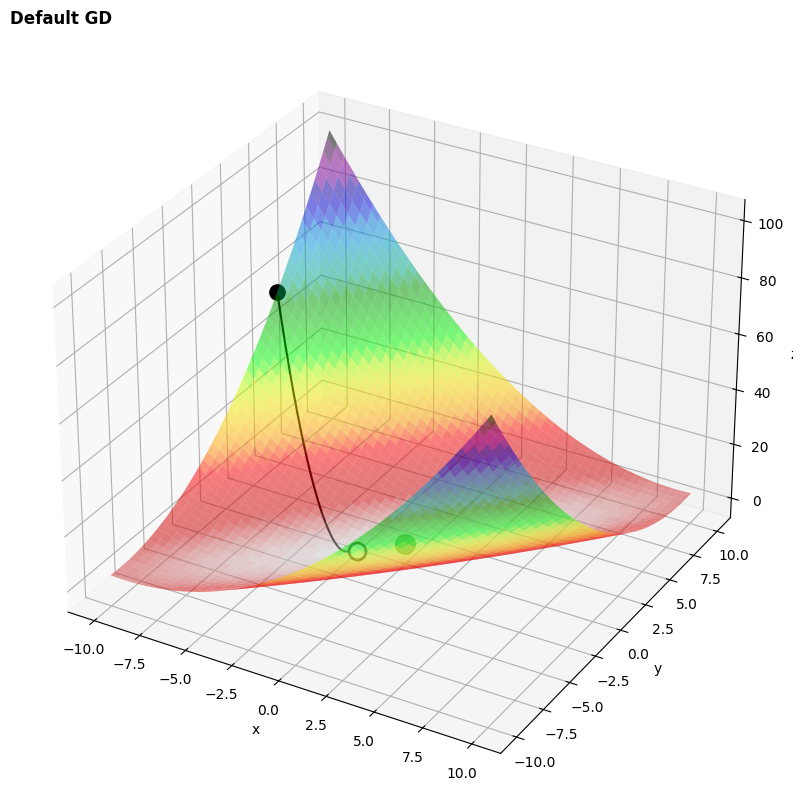

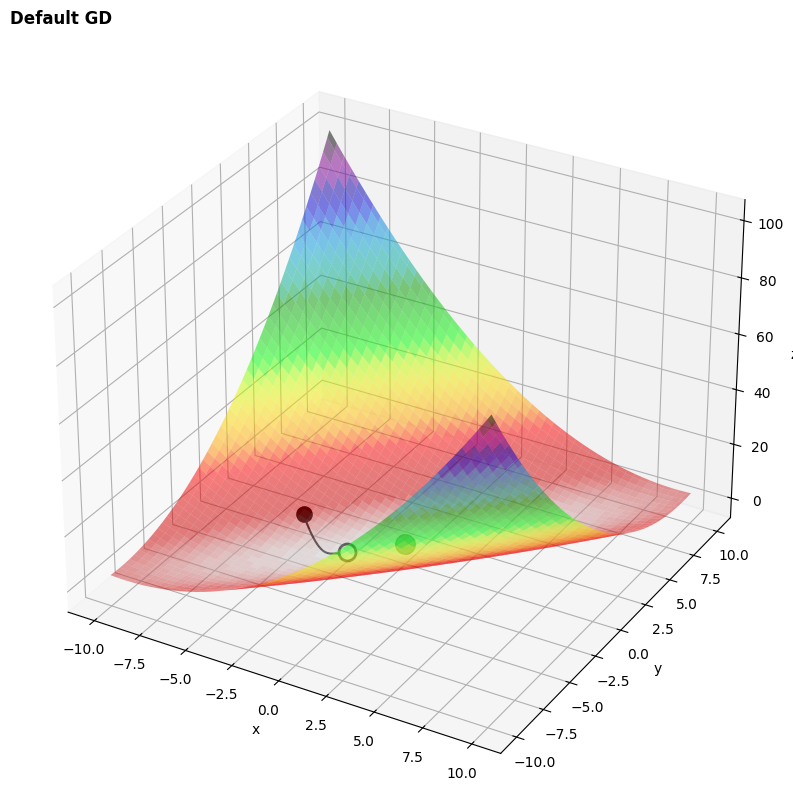

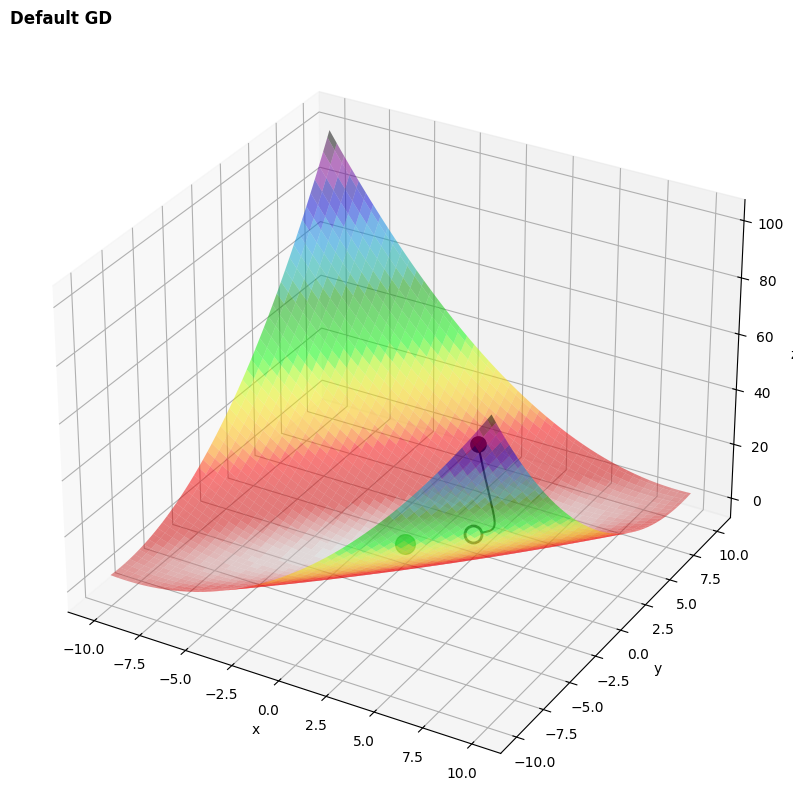

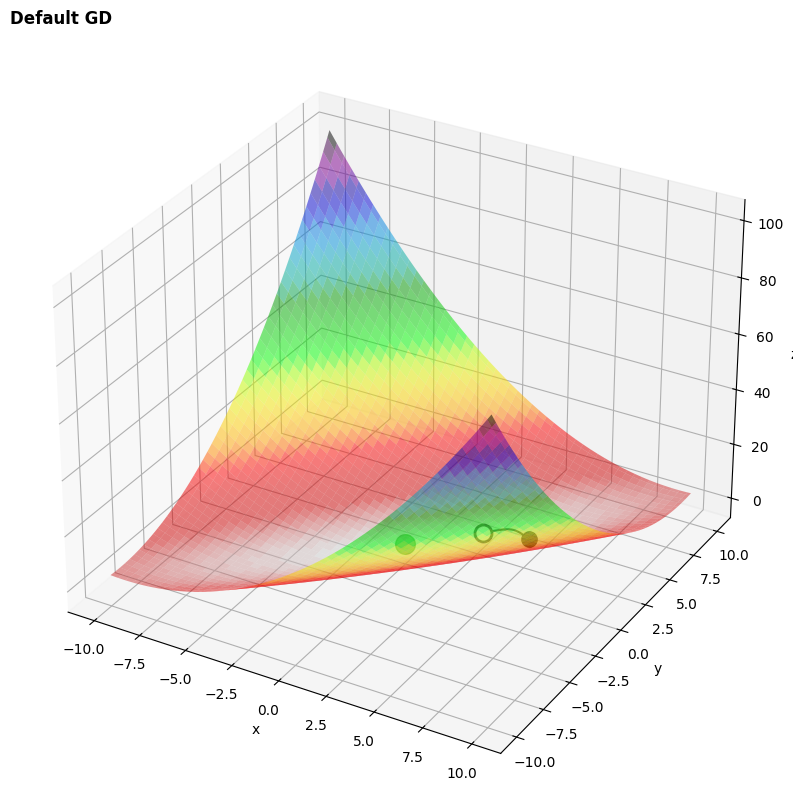

In [25]:
# For Matyas
initial_points = [[-10, 5], [-5, -1], [0, 7], [5, 3]]
for i in initial_points:
  start_time = datetime.now()
  history = GD(Matiac.fuction, Matiac.gradient, i, Matiac.get_min(), max_iter = 10000, lr = 0.001, delta=0.00001)
  print("Matiac default \n", datetime.now() - start_time)
  draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "Default GD")


## Levi Classic

Levi default 
 0:00:00.123130
Starting point:	[-9.00 -3.00 116.00]
Found minimum:	[-1.28e+00 -2.43e+00 2.26e+01]
Global minimum:	[1.00e+00 1.00e+00 0.00e+00]
Error:	-22.569781812747557
Number of iterations:	10001
Levi default 
 0:00:00.093748
Starting point:	[-5.00 -1.00 40.00]
Found minimum:	[-1.59e+00 1.48e+00 1.38e+01]
Global minimum:	[1.00e+00 1.00e+00 0.00e+00]
Error:	-13.801226638692517
Number of iterations:	10001
Levi default 
 0:00:00.100864
Starting point:	[1.00 7.00 36.00]
Found minimum:	[1.00e+00 3.41e+00 7.48e+00]
Global minimum:	[1.00e+00 1.00e+00 0.00e+00]
Error:	-7.480016729519916
Number of iterations:	10001
Levi default 
 0:00:00.095869
Starting point:	[5.00 3.00 20.00]
Found minimum:	[3.60e+00 2.08e+00 1.19e+01]
Global minimum:	[1.00e+00 1.00e+00 0.00e+00]
Error:	-11.939803075259238
Number of iterations:	10001


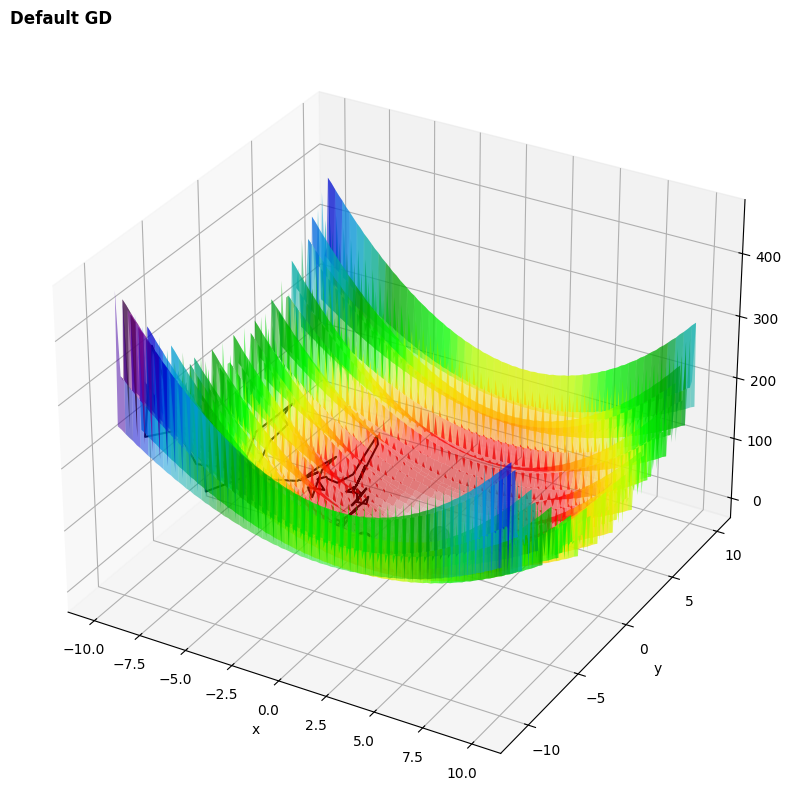

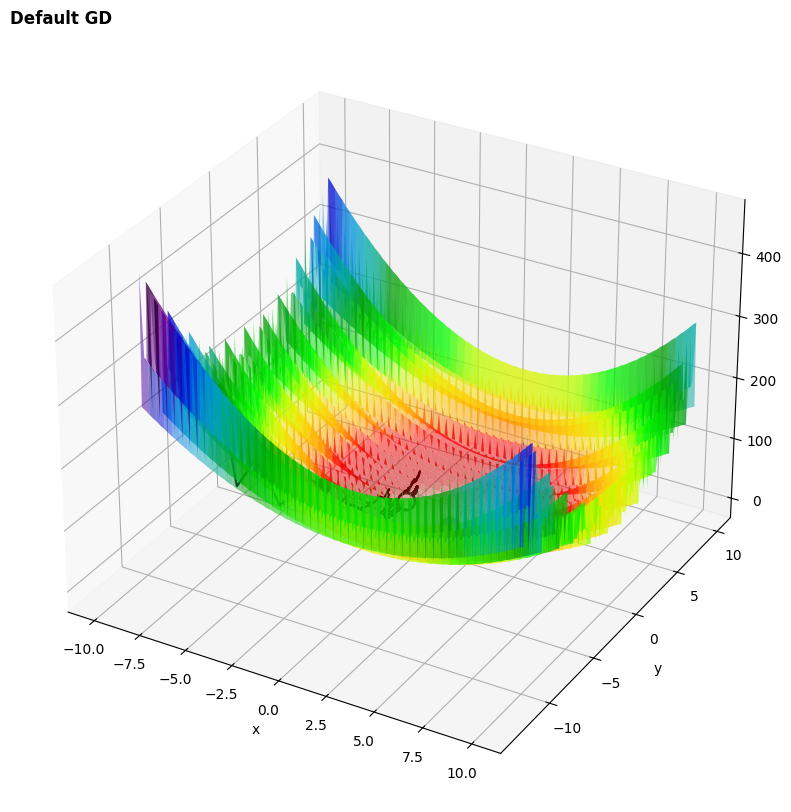

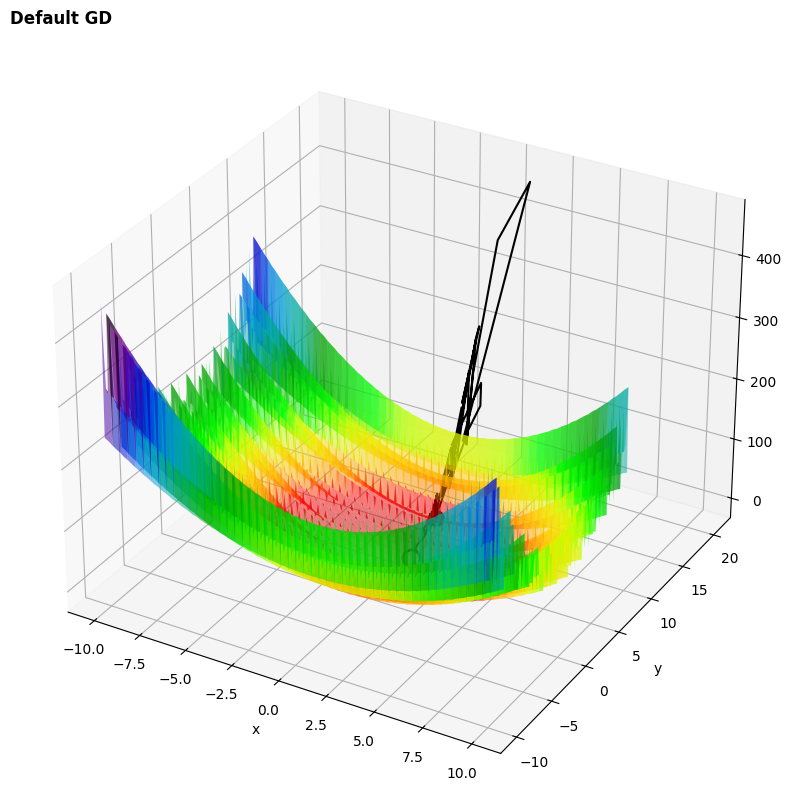

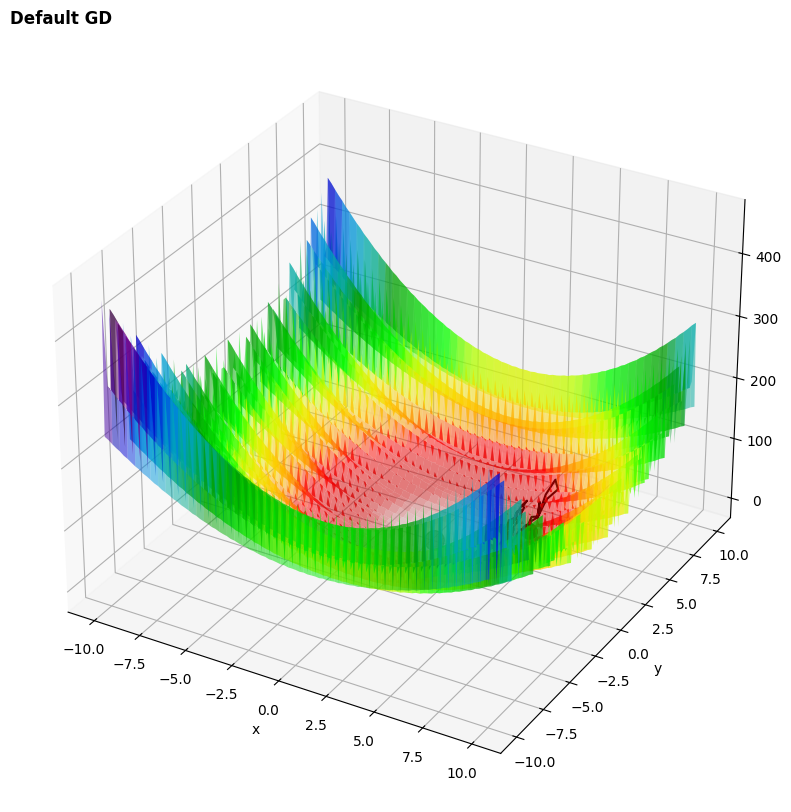

In [26]:
# For Levi
initial_points = [[-9, -3], [-5, -1], [1, 7], [5, 3]]
for i in initial_points:
  start_time = datetime.now()
  history = GD(Levi.fuction, Levi.gradient, i, Levi.get_min(), max_iter = 10000, lr = 0.005)
  print("Levi default \n", datetime.now() - start_time)
  draw_result(Levi.fuction, Levi.get_bounds(), Levi.get_min(), history, "Default GD")

## Momentum Gradient Descent

In [27]:
def MGD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray,
    max_iter: int = 1000, lr: float = 0.1, delta: float = 0.001, beta: float = 0.5
    ) -> np.array:

    """Gradient Descent with Momentum Modification
    
    Args:
        func (callable): function representing the artificial landscape
        grad (callable): gradient of the function
        start_params (np.ndarray): initial set of parameters
        glob_min (np.ndarray): global minimum of the considered function
        max_iter (int, optional): iteration limit. Defaults to 1000.
        lr (float, optional): learning rate. Defaults to 0.1.
        delta (float, optional): convergence radius. Defaults to 0.001.
        beta (float, optional): inertia coefficient. Defaults to 0.5.
    
    Returns:
        np.array: gradient descent history
    """

    # initial set of parameters
    params_prev = start_params.copy()
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):

        # new parameter values
        params_new = params - lr * grad(params) + beta * (params - params_prev)
        params_prev = params
        params = params_new

        # saving the result
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

## Momentum Gradient Descent - Matyas

Matiac inertial sgd
 0:00:00.082393
Starting point:	[-10.00 5.00 56.50]
Found minimum:	[-1.41e+00 -1.41e+00 7.97e-02]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-0.07972570982278493
Number of iterations:	10001


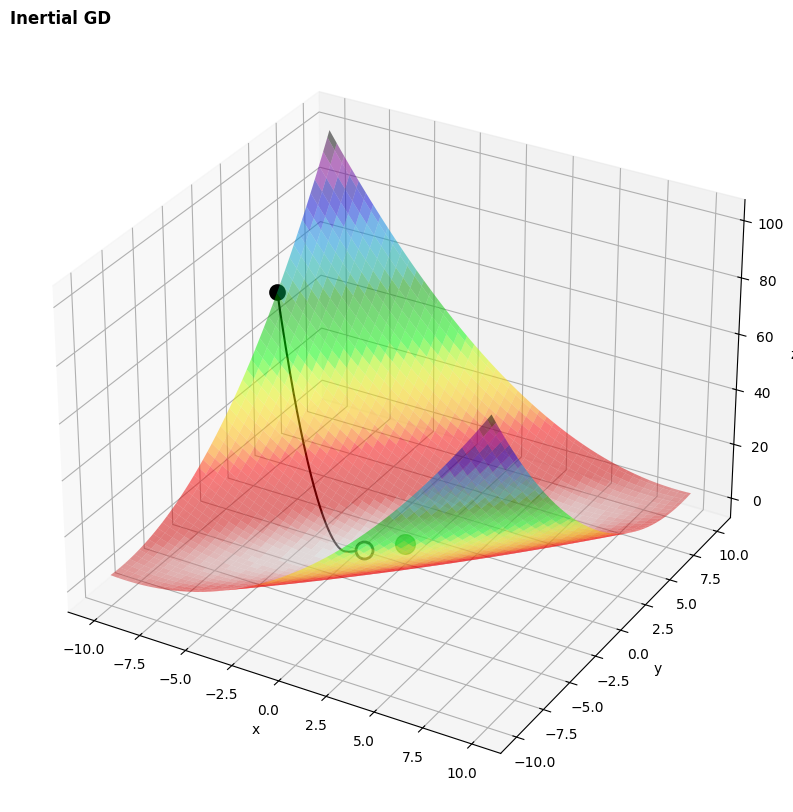

In [28]:
# For Matyas
start_time = datetime.now()
history = MGD(Matiac.fuction, Matiac.gradient, np.array([-10, 5]), Matiac.get_min(), max_iter = 10000, lr = 0.001, delta=0.00001, beta = 0.3)
print("Matiac inertial sgd\n", datetime.now() - start_time)
draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "Inertial GD")

## Momentum Gradient Descent - Levi No. 13

Levi inertial sgd
 0:00:00.138384
Starting point:	[5.00 3.00 20.00]
Found minimum:	[6.70e-01 2.99e+00 4.09e+00]
Global minimum:	[1.00e+00 1.00e+00 0.00e+00]
Error:	-4.085823934886065
Number of iterations:	10001


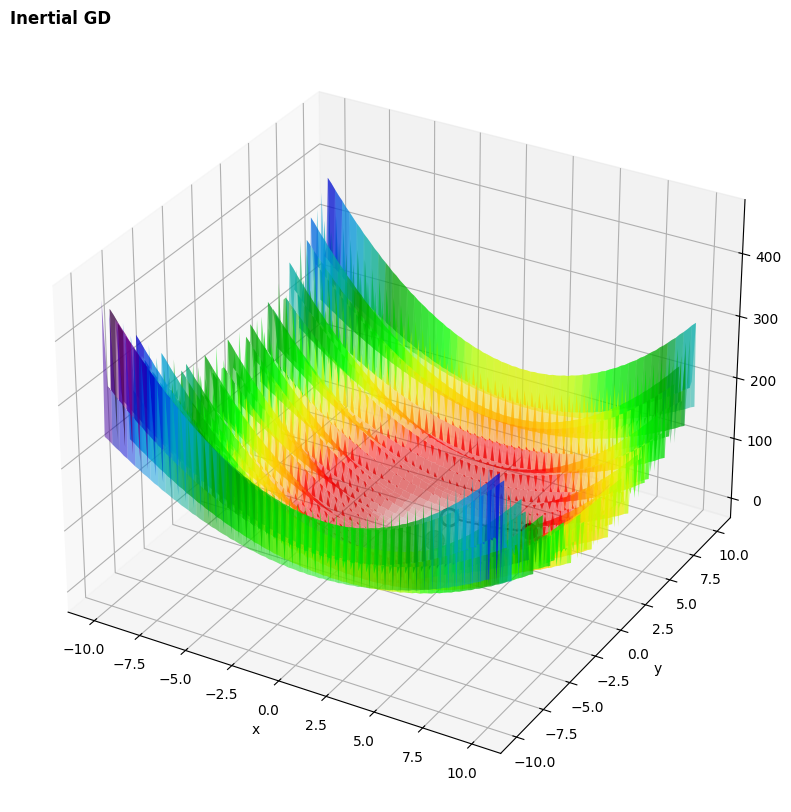

In [29]:
# For Levi No. 13
start_time = datetime.now()
history = MGD(Levi.fuction, Levi.gradient, np.array([5, 3]), Levi.get_min(), max_iter = 10000, lr = 0.001, beta = 0.95)
print("Levi inertial sgd\n", datetime.now() - start_time)
draw_result(Levi.fuction, Levi.get_bounds(), Levi.get_min(), history, "Inertial GD")

## Adaptive Gradient Descent

In [30]:
def AGD(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, max_iter: int = 1000,
    lr: float = 0.1, b1: float = 0.9, b2: float = 0.999, e: float = 10e-8, delta: float = 0.001
    ) -> np.array:

    """Adaptive Gradient Descent: Adam
    
    Args:
        func (callable): function representing the artificial landscape
        grad (callable): gradient of the function
        start_params (np.ndarray): initial set of parameters
        glob_min (np.ndarray): global minimum of the considered function
        max_iter (int, optional): iteration limit. Defaults to 1000.
        lr (float, optional): learning rate. Defaults to 0.1.
        b1 (float, optional): beta1 parameter. Defaults to 0.6.
        b2 (float, optional): beta2 parameter. Defaults to 0.999.
        e (float, optional): epsilon (small value). Defaults to 10e-8.
        delta (float, optional): convergence radius. Defaults to 0.001.
    
    Returns:
        np.array: gradient descent history
    """

    # initial set of parameters
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    # moments initialization
    m = np.array([0, 0])
    v = np.array([0, 0])

    step = 0
    while (step < max_iter and la.norm(history[-1] - glob_min) > delta):

        # calculating moments
        m = b1 * m + (1 - b1) * grad(params)
        v = b2 * v + (1 - b2) * grad(params) ** 2

        # new parameter values
        params = params - lr * m / (np.sqrt(v) + e)

        # saving the result
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

## Adaptive Gradient Descent - Matyas

Matiac AGM
 0:00:00.023986
Starting point:	[-10.00 5.00 56.50]
Found minimum:	[-7.04e-04 -7.03e-04 1.98e-08]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-1.9784698714405353e-08
Number of iterations:	903


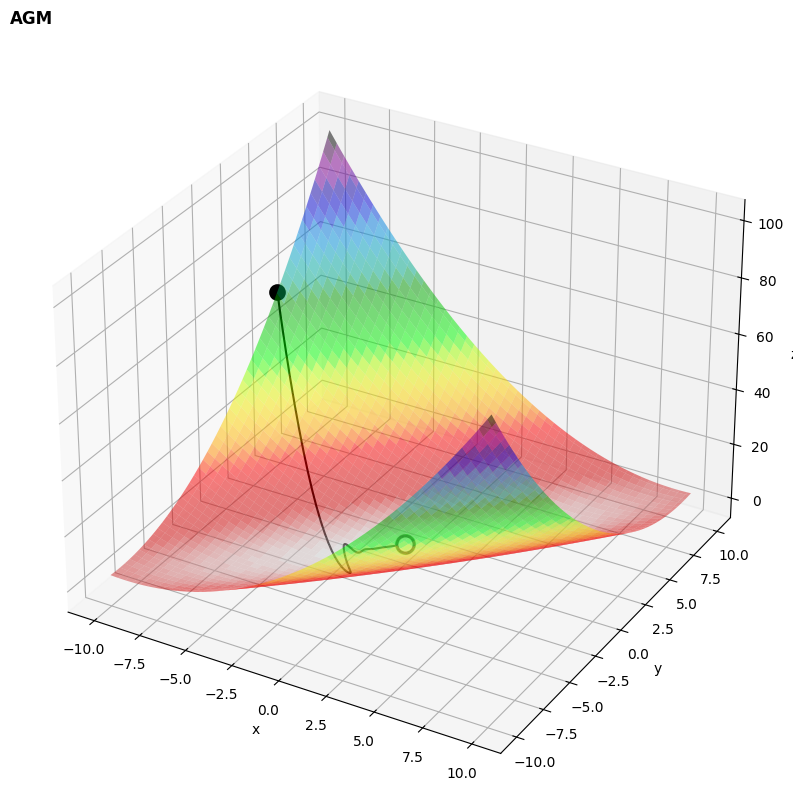

In [31]:
# For Matyas
start_time = datetime.now()
history = AGD(Matiac.fuction, Matiac.gradient, np.array([-10, 5]), Matiac.get_min(), max_iter = 10000, lr = 0.1)
print("Matiac AGM\n", datetime.now() - start_time)
draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "AGM")

## Adaptive Gradient Descent - Levi No. 13

MakKormik AGM
 0:00:00.250597
Starting point:	[5.00 3.00 20.00]
Found minimum:	[4.95e+00 3.00e+00 1.98e+01]
Global minimum:	[1.00e+00 1.00e+00 0.00e+00]
Error:	-19.805650354231716
Number of iterations:	10001


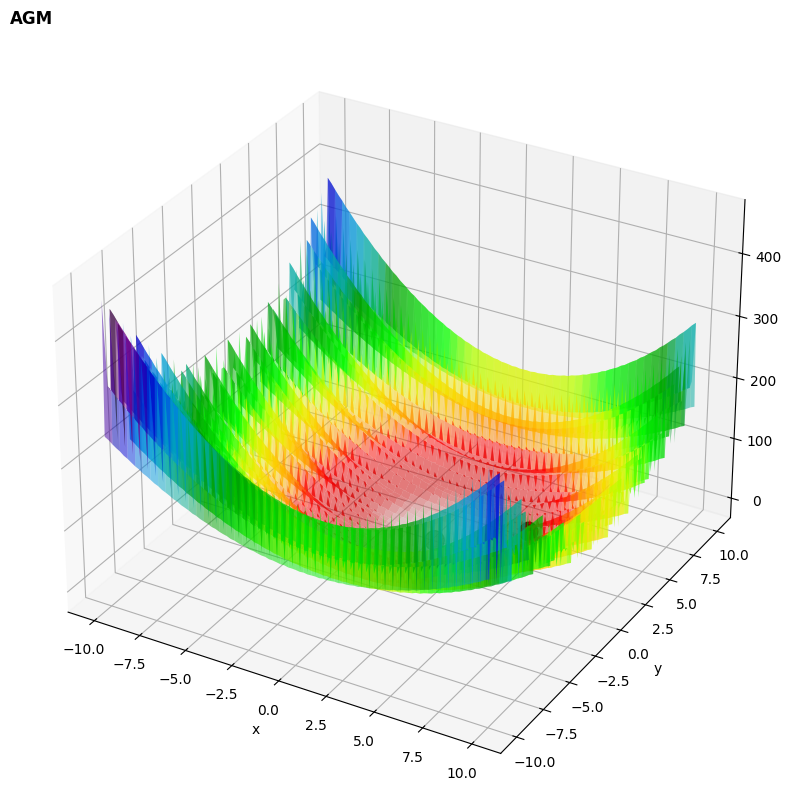

In [32]:
# For Levi No. 13
start_time = datetime.now()
history = AGD(Levi.fuction, Levi.gradient, np.array([5, 3]), Levi.get_min(), max_iter = 10000, lr = 0.001)
print("MakKormik AGM\n", datetime.now() - start_time)
draw_result(Levi.fuction, Levi.get_bounds(), Levi.get_min(), history, "AGM")

## User-Defined Function

Enter the expression, variables should be specified as x, y:  x + y**3 - 2*x*y


Your function default sgd
 0:00:00.105242
[5.39e+00 2.99e+00 -1.05e-01]


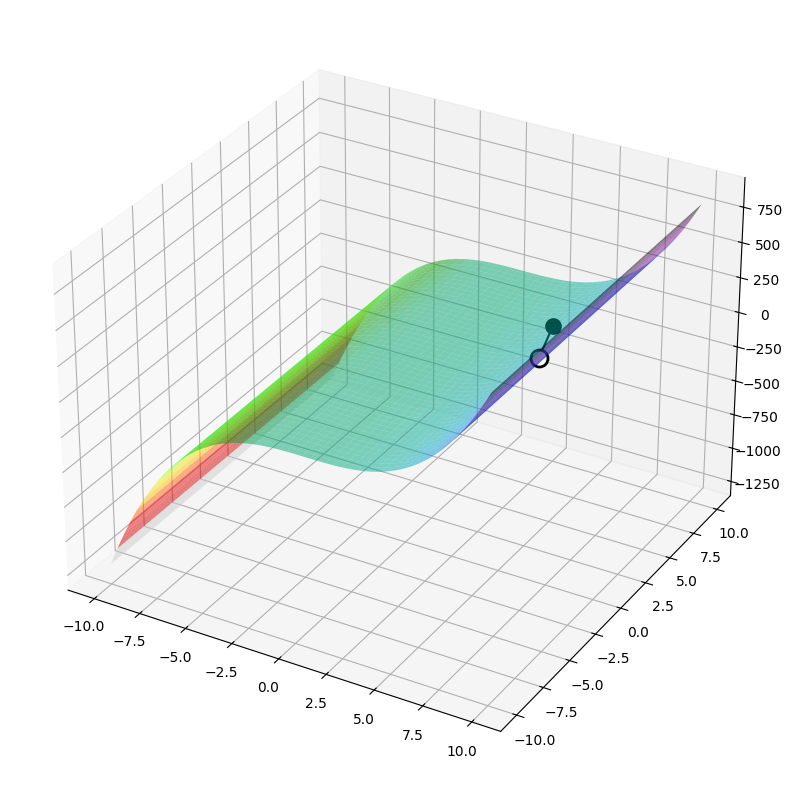

In [34]:

# Define symbols and trigo expression
x, y = symbols('x y')
global Func
expn = input("Enter the expression, variables should be specified as x, y: ")
Func = expn
# Use sympy.sympify() method
gfg = sympify(expn)
def function(fx):
  x, y = symbols('x y')
  gfg = sympify(Func)
  substitutions = {x: fx[0], y: fx[1]}
  return float(gfg.subs(substitutions))


def get_bounds(xy_min):
  return np.array([[xy_min[0] - 10, xy_min[1] - 10], [xy_min[0] + 10, xy_min[1] + 10]])


def get_min():
      return np.array([0., 0., 0.])


def gradient(xy):
  x, y = symbols('x y')
  gfg = sympify(Func)
  substitutions = {x: xy[0], y: xy[1]}
  diffX = diff(gfg, x)
  diffY = diff(gfg, y)
  return np.array([float(diffX.subs(substitutions)), float(diffY.subs(substitutions))])
def draw_result_func(func: callable, history: np.array) -> None:
  fig = plt.figure(figsize=(10,10))
  ax = plt.axes(projection = '3d')
  x = np.linspace(-10, 10, 100)
  y = np.linspace(-10, 10, 100)
  x_grid, y_grid = np.meshgrid(x,y)
  z = []
  for i in range(len(x)):
    a = func(np.array([x[i], y[i]]))
    z.append(a)

  z_grid=np.asarray(np.meshgrid(z))
  ax.plot_surface(x_grid, y_grid, z_grid, cmap = 'nipy_spectral_r', alpha=0.5)
  ax.plot(history[:, 0], history[:, 1], history[:, 2], '-', c='black', alpha = 1)
  ax.scatter3D(history[0, 0], history[0, 1], history[0, 2], s=100, c="black", lw=2, ec='black', marker = 'o')
  ax.scatter3D(history[-1, 0], history[-1, 1], history[-1, 2], s=150, c="white", lw=2, ec='black', marker = 'o', alpha = 1)

start_time = datetime.now()
history = GD(function, gradient, np.array([5,5]), get_min(), max_iter = 10000, lr = 0.001)
print("Your function default sgd\n", datetime.now() - start_time)
print(history[-1])
draw_result_func(function, history)

## Learning Rate Method

In [35]:
def GD_LR(
    func: callable, grad: callable, start_params: np.ndarray, glob_min: np.ndarray, lr: [],
    max_iter: int = 1000, delta: float = 0.001
    ) -> np.array:

    """Gradient Descent
    
    Args:
        func (callable): function representing the artificial landscape
        grad (callable): gradient of the function
        start_params (np.ndarray): initial set of parameters
        glob_min (np.ndarray): global minimum of the considered function
        max_iter (int, optional): iteration limit. Defaults to 1000.
        lr (float, optional): learning rate. Defaults to 0.1.
        delta (float, optional): convergence radius. Defaults to 0.001.
    
    Returns:
        np.array: gradient descent history
    """
    
    # initial set of parameters
    params = start_params.copy()
    history = [np.array([params[0], params[1], func(params)])]

    step = 0
    while (step < max_iter and (history[-1][2] - glob_min[2]) > delta):

        # new parameter values
        params = params - lr[step] * grad(params)

        # saving the result
        history.append(np.array([params[0], params[1], func(params)]))
        step += 1

    return np.array(history)

In [36]:
def exponential_decay(initial_lr, decay_rate, iteration):
  lr = []
  for i in range(iteration):
    # Update learning rate exponentially based on the decay rate and epoch
    lr.append(initial_lr * (decay_rate ** i))
  return lr

Matiac inertial 
 0:00:00.052210
Starting point:	[-10.00 5.00 56.50]
Found minimum:	[-7.50e-01 -7.50e-01 2.25e-02]
Global minimum:	[0.00e+00 0.00e+00 0.00e+00]
Error:	-0.022515088517058246
Number of iterations:	10001


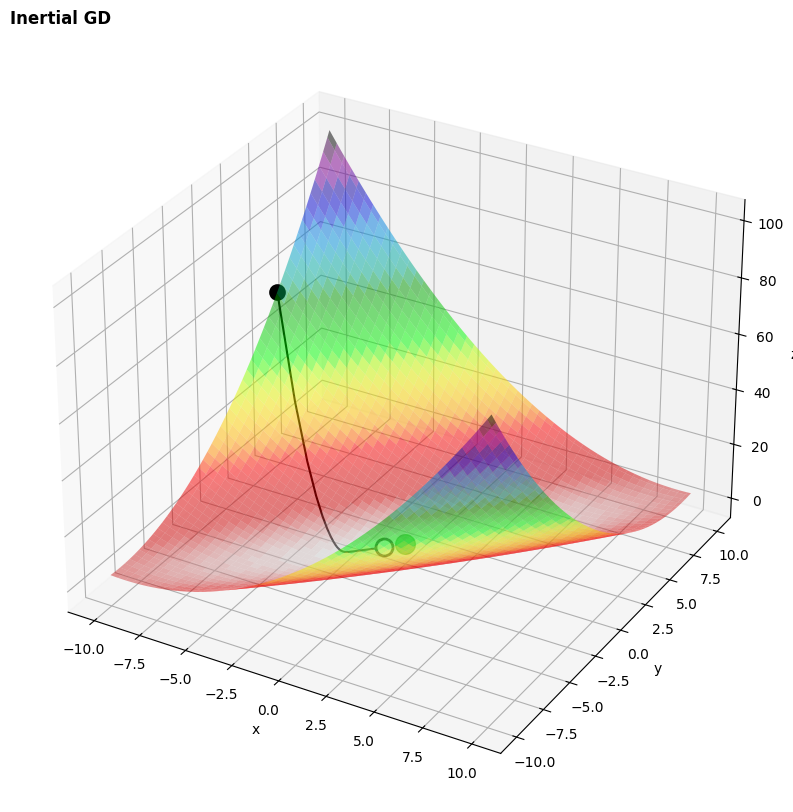

In [37]:
lr = exponential_decay(0.3, 0.99, 10000)
start_time = datetime.now()
history = GD_LR(Matiac.fuction, Matiac.gradient, np.array([-10, 5]), Matiac.get_min(), lr, max_iter = 10000)
print("Matiac inertial \n", datetime.now() - start_time)
draw_result(Matiac.fuction, Matiac.get_bounds(), Matiac.get_min(), history, "Inertial GD")